In [1]:
# importing libraries
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as cm
from matplotlib.colors import hsv_to_rgb
from cycler import cycler
import matplotlib
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiLineString
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Loading the data 
path = './Data/'
filename ='city_code_en.csv'
filename2 = 'flow_20200110_20200430_all.csv'

# loading city code file
df1 = pd.read_csv(path+filename,index_col='city_id')
df1.head()

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province


In [4]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320583 Kunshan City,320000,Jiangsu Province,NaN


In [5]:
df1.drop('320583 Kunshan City',inplace=True)

In [6]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320600,Nantong city,320000,Jiangsu Province


In [7]:
df1.reset_index(drop=False,inplace=True)

In [8]:
new_entry = ['320583', 'Kunshan City', '320000','Jiangsu Province']  
df1.append(pd.Series(new_entry, index=df1.columns[:len(new_entry)]), ignore_index=True)

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province
...,...,...,...,...
385,719009,Nantou County,710000,Taiwan Province
386,719010,Chiayi County,710000,Taiwan Province
387,810000,Hong Kong,810000,Hong Kong
388,820000,Macao,820000,Macao


In [9]:
df1.head()

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province


In [10]:
name_list=df1['city_name'].tolist()

In [11]:
d =  Counter(name_list)  # -> Counter
res = [k for k, v in d.items() if v > 1]
print(res)

['Yichun', 'Suzhou City', 'Taizhou', 'Shengzhou', 'Fuzhou', 'Yulin']


In [12]:
df1.shape

(389, 4)

In [13]:
df1['city_id'].nunique()

389

## Data cleaning and Aggregation

In [14]:
# Reading in the mobility data
df2=pd.read_csv(path+filename2)
crs={'init':'EPSG:4326'}
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006.0,110.395985,18.795179,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200.0,109.508000,18.256600,230900.0,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400.0,117.629800,26.265600,230900.0,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300.0,112.334000,16.832200,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200.0,111.196200,34.774600,230900.0,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df2["city_id_o"]=df2["city_id_o"].astype(int)

In [16]:
df2["city_id_d"]=df2["city_id_d"].astype(int)

In [17]:
df2["city_id_o"]=df2["city_id_o"].astype(str)

In [18]:
df2["city_id_d"]=df2["city_id_d"].astype(str)

In [19]:
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df2.shape

(133590, 122)

In [21]:
df2['city_id_o'].nunique()

366

In [22]:
df2['city_id_d'].nunique()

366

In [23]:
# Dropping the columns in foreign language
df2.drop(df2.iloc[:, 0:4], axis=1, inplace=True)
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df2["origin_city"] = df2["city_id_o"].map(df1.set_index("city_id")["city_name"])
df2["dest_city"] = df2["city_id_d"].map(df1.set_index("city_id")["city_name"])
df2["origin_province"] = df2["city_id_o"].map(df1.set_index("city_id")["pro_name"])
df2["dest_province"] = df2["city_id_d"].map(df1.set_index("city_id")["pro_name"])

In [25]:
df2['city_id_o'].nunique()

366

In [26]:
df2['city_id_d'].nunique()

366

In [27]:
df2['origin_city'].nunique()

356

In [28]:
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,origin_city,dest_city,origin_province,dest_province
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,Wanning,Qitaihe,Hainan,Heilongjiang Province
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0,Sanya,Qitaihe,Hainan,Heilongjiang Province
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Sanming,Qitaihe,Fujian Province,Heilongjiang Province
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sansha,Qitaihe,Hainan,Heilongjiang Province
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sanmenxia,Qitaihe,Henan Province,Heilongjiang Province


In [29]:
df2["origin_city"] = df2["origin_city"].str.replace("City","")
df2["origin_province"] = df2["origin_province"].str.replace("Province","")
df2["dest_city"] = df2["dest_city"].str.replace("City","")
df2["dest_province"] = df2["dest_province"].str.replace("Province","")

In [30]:
df2['origin_city'].nunique()

356

In [31]:
df2['city_id_o'].nunique()

366

In [32]:
# Reordering the dataframe for better layout 
cols_to_order=['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']
new_columns = cols_to_order + (df2.columns.drop(cols_to_order).tolist())
df2=df2[new_columns]
df2.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df2.shape

(133590, 122)

In [34]:
# Aggregating weekly data for the whole data file
a= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a = a.resample('W', axis=1).sum().reset_index()
a.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,47,170,232,66,11,6,7,10,11,11,18,17,32,20,29,23,17
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,1,4,4,9,4,1,4,2,6,1,3,7,2,11,14,0
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,24,16,5,2,0,0,0,2,5,1,5,2,4,10,6,1
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,31,37,7,5,2,0,0,1,2,3,1,0,1,3,1,1,1


In [35]:
old_names = a.columns.tolist()
old_names

['origin_city',
 'origin_province',
 'city_id_o',
 'X_o',
 'Y_o',
 'dest_city',
 'dest_province',
 'city_id_d',
 'X_d',
 'Y_d',
 Timestamp('2020-01-12 00:00:00', freq='W-SUN'),
 Timestamp('2020-01-19 00:00:00', freq='W-SUN'),
 Timestamp('2020-01-26 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-02 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-09 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-16 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-23 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-01 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-08 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-15 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-22 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-29 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-05 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-12 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-19 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-26 00:00:00', freq='W-SUN'),
 Timestamp('2020-05-03 00:00:00', freq='W-SUN')]

In [36]:
new_names = ['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11','Week12','Week13','Week14','Week15','Week16','Week17'] 

In [37]:
a = a.rename(columns=dict(zip(old_names, new_names))) 
a.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [38]:
#saving the weekly aggregated file
#a.to_csv('./Data/weekly_aggregation_final.csv',index=False)

In [39]:
a.shape

(133590, 27)

In [40]:
a.describe()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000
mean,110.879881,32.676788,110.879881,32.676788,313.253470,749.462961,755.931582,296.219440,150.147631,123.143244,191.102395,292.257579,316.004484,345.282469,382.664129,405.844157,496.889049,452.915188,423.539614,404.968553,247.170694
std,10.323724,7.375042,10.323724,7.375042,2856.563525,5926.825595,6171.605195,2351.942713,1337.033554,1153.209859,1663.913186,2533.343186,2982.608122,3427.358708,3791.178338,4032.744581,4853.443380,4379.578678,4347.369672,4224.588353,2438.349814
min,75.992600,16.832200,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.226800,27.368800,106.226800,27.368800,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,112.669439,32.170500,112.669439,32.170500,9.000000,24.000000,20.000000,8.000000,3.000000,2.000000,4.000000,6.000000,7.000000,7.000000,10.000000,10.000000,10.000000,11.000000,10.000000,9.000000,6.000000
75%,117.478800,37.869600,117.478800,37.869600,49.000000,128.000000,114.000000,47.000000,17.000000,14.000000,24.000000,39.000000,43.000000,45.000000,53.000000,55.000000,57.000000,59.000000,54.000000,51.000000,34.000000
max,131.151400,52.451053,131.151400,52.451053,238145.000000,438085.000000,434504.000000,129689.000000,74333.000000,99046.000000,134575.000000,200937.000000,257190.000000,310956.000000,340345.000000,365848.000000,410584.000000,366147.000000,406575.000000,388885.000000,211469.000000


In [41]:
a['origin_city'].nunique()

356

In [42]:
# Aggregating by month
a_m= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a_m = a_m.resample('M', axis=1).sum().reset_index()
a_m.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,6,14,5
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,99,86,111,123
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,1,0,5
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,5,0,1,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,510,38,69,110
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,0,2,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,21,15,31
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,49,2,13,23
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,79,4,6,7


In [43]:
# Describing the aggregation by week
a.describe()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000
mean,110.879881,32.676788,110.879881,32.676788,313.253470,749.462961,755.931582,296.219440,150.147631,123.143244,191.102395,292.257579,316.004484,345.282469,382.664129,405.844157,496.889049,452.915188,423.539614,404.968553,247.170694
std,10.323724,7.375042,10.323724,7.375042,2856.563525,5926.825595,6171.605195,2351.942713,1337.033554,1153.209859,1663.913186,2533.343186,2982.608122,3427.358708,3791.178338,4032.744581,4853.443380,4379.578678,4347.369672,4224.588353,2438.349814
min,75.992600,16.832200,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.226800,27.368800,106.226800,27.368800,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,112.669439,32.170500,112.669439,32.170500,9.000000,24.000000,20.000000,8.000000,3.000000,2.000000,4.000000,6.000000,7.000000,7.000000,10.000000,10.000000,10.000000,11.000000,10.000000,9.000000,6.000000
75%,117.478800,37.869600,117.478800,37.869600,49.000000,128.000000,114.000000,47.000000,17.000000,14.000000,24.000000,39.000000,43.000000,45.000000,53.000000,55.000000,57.000000,59.000000,54.000000,51.000000,34.000000
max,131.151400,52.451053,131.151400,52.451053,238145.000000,438085.000000,434504.000000,129689.000000,74333.000000,99046.000000,134575.000000,200937.000000,257190.000000,310956.000000,340345.000000,365848.000000,410584.000000,366147.000000,406575.000000,388885.000000,211469.000000


In [44]:
# Describing the aggregation by week
a_m.describe()

,X_o,Y_o,X_d,Y_d,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00
count,133590.000000,133590.000000,133590.000000,133590.000000,1.335900e+05,133590.000000,1.335900e+05,1.335900e+05
mean,110.879881,32.676788,110.879881,32.676788,2.052395e+03,774.328670,1.614881e+03,1.905191e+03
std,10.323724,7.375042,10.323724,7.375042,1.585302e+04,6628.223275,1.575392e+04,1.888008e+04
min,75.992600,16.832200,75.992600,16.832200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,106.226800,27.368800,106.226800,27.368800,1.000000e+01,2.000000,6.000000e+00,7.000000e+00
50%,112.669439,32.170500,112.669439,32.170500,6.600000e+01,17.000000,4.200000e+01,4.500000e+01
75%,117.478800,37.869600,117.478800,37.869600,3.480000e+02,102.000000,2.260000e+02,2.400000e+02
max,131.151400,52.451053,131.151400,52.451053,1.020737e+06,500981.000000,1.413563e+06,1.674858e+06


In [45]:
# Drilling down to analyze Hubei province during the lockdown period
hubei_df=a[a['origin_province'].str.match('Hubei')]
hubei_df.describe()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000
mean,112.883294,30.842482,110.874392,32.681814,237.927961,535.331829,555.584045,67.336664,49.352458,52.893473,53.172764,56.361322,47.136180,65.712329,268.505238,352.220145,305.249315,331.883642,295.119259,264.497502,160.937953
std,1.596752,0.736652,10.337780,7.384978,2104.045959,4753.075905,5016.534860,524.710134,471.123735,479.324227,444.308080,447.082975,426.229364,512.279200,1362.188704,1813.701864,1738.605051,2459.599785,2375.064640,2173.673257,1337.685811
min,109.475000,29.843800,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.133132,30.364899,106.226800,27.368800,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,113.160107,30.595400,112.606278,32.203200,10.000000,27.000000,31.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,14.000000,21.000000,21.000000,22.000000,18.000000,14.000000,8.000000
75%,114.298400,31.036000,117.478800,37.869600,46.000000,117.000000,148.000000,10.000000,3.000000,3.000000,6.000000,7.000000,4.000000,7.000000,65.000000,97.000000,93.000000,92.000000,74.000000,61.000000,36.000000
max,115.031200,32.652800,131.151400,52.451053,78575.000000,182191.000000,225270.000000,14978.000000,14958.000000,14905.000000,13683.000000,12890.000000,12058.000000,13681.000000,29906.000000,49244.000000,48947.000000,89690.000000,83787.000000,71507.000000,41534.000000


In [46]:
hubei_df.groupby(['origin_city','dest_city']).median()

X_o  \
origin_city                                dest_city                                               
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   109.4750   
                                           Aba Tibetan and Qiang Autonomous Prefecture  109.4750   
                                           Aksu region                                  109.4750   
                                           Ali area                                     109.4750   
                                           Altay region                                 109.4750   
...                                                                                          ...   
Yichang                                    Zhuzhou                                      111.2776   
                                           Zibo                                         111.2776   
                                           Zigong                                       111.2776   
                                           Ziyang                                       111.2776   
                                           Zunyi                                        111.2776   

                                                                                            Y_o  \
origin_city                                dest_city                                              
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   30.2702   
                                           Aba Tibetan and Qiang Autonomous Prefecture  30.2702   
                                           Aksu region                                  30.2702   
                                           Ali area                                     30.2702   
                                           Altay region                                 30.2702   
...                                                                                         ...   
Yichang                                    Zhuzhou                                      30.7040   
                                           Zibo                                         30.7040   
                                           Zigong                                       30.7040   
                                           Ziyang                                       30.7040   
                                           Zunyi                                        30.7040   

                                                                                             X_d  \
origin_city                                dest_city                                               
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   121.4256   
                                           Aba Tibetan and Qiang Autonomous Prefecture  102.2204   
                                           Aksu region                                   80.2620   
                                           Ali area                                      80.0960   
                                           Altay region                                  88.1364   
...                                                                                          ...   
Yichang                                    Zhuzhou                                      113.1236   
                                           Zibo                                         118.0522   
                                           Zigong                                       104.7652   
                                           Ziyang                                       104.6262   
                                           Zunyi                                        106.9224   

                                                                                            Y_d  \
origin_city                                dest_city                                              
Enshi

In [47]:
# drilling further down to Wuhan to understand better the numbers
wh=hubei_df[hubei_df['origin_city'].str.match('Wuhan')]
wh

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
191,Wuhan,Hubei,420100,114.2984,30.5954,Qitaihe,Heilongjiang,230900,130.929200,45.784200,11,43,43,2,1,0,2,0,0,0,1,1,0,0,4,2,1
554,Wuhan,Hubei,420100,114.2984,30.5954,Wanning,Hainan,469006,110.395985,18.795179,72,172,236,0,0,0,1,2,4,0,1,0,1,18,8,10,2
917,Wuhan,Hubei,420100,114.2984,30.5954,Sanya,Hainan,460200,109.508000,18.256600,833,1795,1964,18,1,1,2,3,0,0,4,3,7,390,108,113,69
1280,Wuhan,Hubei,420100,114.2984,30.5954,Sanming,Fujian,350400,117.629800,26.265600,443,1310,814,5,12,8,9,9,3,8,13,26,22,115,87,82,49
1643,Wuhan,Hubei,420100,114.2984,30.5954,Sansha,Hainan,460300,112.334000,16.832200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131235,Wuhan,Hubei,420100,114.2984,30.5954,Southwest Guizhou Buyi and Miao Autonomous Pre...,Guizhou,522300,104.894800,25.088000,321,487,256,7,2,0,4,4,2,3,2,2,9,47,22,42,16
131598,Wuhan,Hubei,420100,114.2984,30.5954,Qiqihar,Heilongjiang,230200,123.920600,47.362600,104,258,225,7,4,2,2,1,3,9,7,5,59,16,19,5,5
131961,Wuhan,Hubei,420100,114.2984,30.5954,Longyan,Fujian,350800,117.027400,25.102800,219,531,511,3,1,4,3,4,5,4,4,11,10,69,54,35,27
132742,Wuhan,Hubei,420100,114.2984,30.5954,Jinan,Shandong,370100,117.113400,36.652600,1177,1944,1049,15,19,33,21,24,18,24,42,62,104,431,343,303,214


In [48]:
#df2.to_csv('./Data/final_file.csv')

In [49]:
df2['city_id_o'].nunique()

366

In [50]:
df2['origin_city'].nunique()

356

### Data Manipulation for Mapping

In [51]:
# Trying to pivot the data file 
visual_df=df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).stack().reset_index().rename(columns = {'level_10' : 'Date', 0: 'Val'})
visual_df.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200110,0
1,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200111,0
2,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200112,0
3,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200113,0
4,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200114,0


In [52]:
visual_df['Date'].dtypes

dtype('O')

In [53]:
# converting to datetime format
visual_df['Date'] = pd.to_datetime(visual_df['Date'], format= '%Y/%m/%d')

In [54]:
visual_df.dtypes

origin_city                object
origin_province            object
city_id_o                  object
X_o                       float64
Y_o                       float64
dest_city                  object
dest_province              object
city_id_d                  object
X_d                       float64
Y_d                       float64
Date               datetime64[ns]
Val                         int64
dtype: object

In [55]:
visual_df.groupby(visual_df.Date.dt.strftime('%W')).Val.sum()

Date
01     41847531
02    100120757
03    100984900
04     39571955
05     20058222
06     16450706
07     25529369
08     39042690
09     42215039
10     46126285
11     51120101
12     54216721
13     66379408
14     60504940
15     56580657
16     54099749
17     33019533
Name: Val, dtype: int64

In [56]:
visual_df.shape

(14962080, 12)

In [57]:
# Aggregating the whole data set by weekly and starting with every Monday to reduce and visualize it better
df_final = (visual_df
     .reset_index()
     .set_index("Date")
     .groupby(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d',pd.Grouper(freq='W-MON')])["Val"].sum()
     .astype(int)
     .reset_index())
df_final.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-13,6
1,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-20,11
2,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-27,13
3,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-02-03,3
4,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-02-10,3


In [58]:
df_final.shape

(2271030, 12)

In [59]:
# Reducing the data shape to filter out the lowest values for the mobility
df_mapping = df_final[~(df_final['Val'] < 125)]  
df_mapping.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
85,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-13,332
86,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-20,520
87,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-27,218
102,of Yantai,Shandong,370600,121.4256,37.4648,Anqing,Anhui,340800,117.0450,30.5180,2020-01-13,213
103,of Yantai,Shandong,370600,121.4256,37.4648,Anqing,Anhui,340800,117.0450,30.5180,2020-01-20,512


In [60]:
df_mapping.shape

(342843, 12)

In [61]:
df_mapping['Val'].describe()

count    342843.000000
mean       2381.059972
std        9306.437333
min         125.000000
25%         204.000000
50%         393.000000
75%        1140.000000
max      406974.000000
Name: Val, dtype: float64

In [62]:
df3=df_final.drop(['origin_province','dest_city','dest_province','city_id_d','X_d','Y_d','Date','Val'],axis=1)
df3.head()

,origin_city,city_id_o,X_o,Y_o
0,of Yantai,370600,121.4256,37.4648
1,of Yantai,370600,121.4256,37.4648
2,of Yantai,370600,121.4256,37.4648
3,of Yantai,370600,121.4256,37.4648
4,of Yantai,370600,121.4256,37.4648


In [63]:
# Reordering the dataframe for better layout 
cols_to_order=['city_id_o','origin_city','Y_o','X_o']
new_columns = cols_to_order + (df3.columns.drop(cols_to_order).tolist())
df3=df3[new_columns]
df3.head()

,city_id_o,origin_city,Y_o,X_o
0,370600,of Yantai,37.4648,121.4256
1,370600,of Yantai,37.4648,121.4256
2,370600,of Yantai,37.4648,121.4256
3,370600,of Yantai,37.4648,121.4256
4,370600,of Yantai,37.4648,121.4256


In [64]:
#saving the csv for mapping
#df3.drop_duplicates(['city_id_o','origin_city']).to_csv('./Data/locations.csv',index=False)

In [65]:
# Creating file to utilise both city ids and value with date in a visualization
df4=df_mapping.drop(['origin_province','origin_city','X_o','Y_o','dest_province','dest_city','X_d','Y_d'],axis=1)
df4.head()

,city_id_o,city_id_d,Date,Val
85,370600,610900,2020-01-13,332
86,370600,610900,2020-01-20,520
87,370600,610900,2020-01-27,218
102,370600,340800,2020-01-13,213
103,370600,340800,2020-01-20,512


In [66]:
# Reordering the dataframe for better layout 
cols_to_order=['city_id_o','city_id_d','Val','Date']
new_columns = cols_to_order + (df4.columns.drop(cols_to_order).tolist())
df4=df4[new_columns]
df4.head()

,city_id_o,city_id_d,Val,Date
85,370600,610900,332,2020-01-13
86,370600,610900,520,2020-01-20
87,370600,610900,218,2020-01-27
102,370600,340800,213,2020-01-13
103,370600,340800,512,2020-01-20


In [67]:
#df4.groupby(['origin_city','dest_city','Date'])['Val'].sum()
df4['Date'] = pd.to_datetime(df4['Date']).dt.strftime('%Y-%m-%d')
df4.head()

,city_id_o,city_id_d,Val,Date
85,370600,610900,332,2020-01-13
86,370600,610900,520,2020-01-20
87,370600,610900,218,2020-01-27
102,370600,340800,213,2020-01-13
103,370600,340800,512,2020-01-20


In [68]:
#saving the csv for mapping
#df4.to_csv('./Data/flows.csv',index=False)

In [69]:
#saving the csv for mapping
#df_final.to_csv('./Data/mapping_visual.csv',index=False)

### Origin City and Province Analysis

In [52]:
# Aggregating by Origin City and Origin Province
#orig_df=df2.drop(df2.iloc[:, 2:10], axis=1)
#orig_df.head()
orig_df=a.drop(a.iloc[:, 2:10], axis=1)
orig_df.head()

,origin_city,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,Hainan,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
orig_df.shape

(133590, 19)

In [54]:
# just origin city
origin_city_df=orig_df.drop(columns=['origin_province'])
origin_city_df.head()

,origin_city,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
bar_orig=origin_city_df.groupby('origin_city').sum().sum()

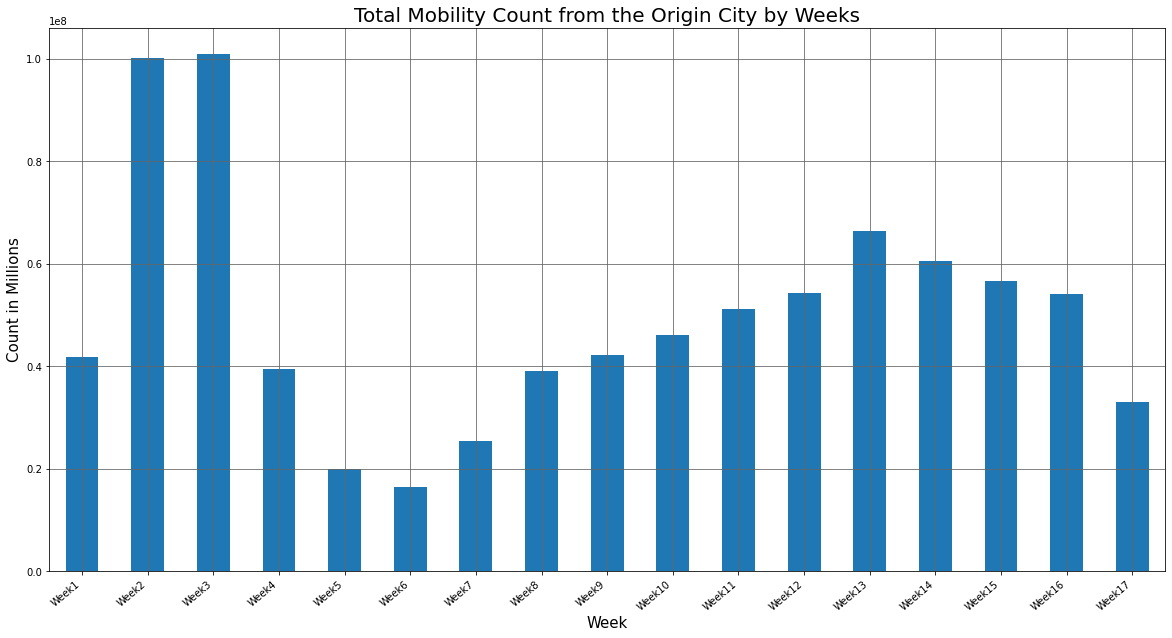

In [56]:
ax=bar_orig.plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Total Mobility Count from the Origin City by Weeks', fontsize=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Count in Millions', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/total_origin_mobility.png') 
plt.show()


In [57]:
origin_city_df.shape

(133590, 18)

In [58]:
# grouping origin city by total sum daily
origin_city_aggreagted_by_day=origin_city_df.groupby(['origin_city']).sum()
origin_city_aggreagted_by_day.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_city,,,,,,,,,,,,,,,,,
of Yantai,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125
Aba Tibetan and Qiang Autonomous Prefecture,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454
Aksu region,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554
Ali area,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467
Altay region,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743


In [63]:
# grouping to check the total sum of the values of movement for each origin province
o_prov=orig_df.groupby(['origin_province']).sum()
o_prov.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_province,,,,,,,,,,,,,,,,,
Anhui,1456637,3333612,4006289,2494359,1192636,860228,1617712,2506260,2522820,2530804,2696338,2651896,3203949,3038523,2637823,2526186,1473057
Beijing,1214735,2961398,3800371,417079,216294,191186,210540,259995,281412,312878,362939,420203,496803,443559,476841,573435,420021
Chongqing,396255,1101762,1516834,669751,280873,188865,316507,593953,618291,585344,564926,549541,659827,564088,532516,503007,323363
Fujian,1185945,3117546,2871000,997542,580153,487016,814812,1058500,1069260,1161268,1262223,1274638,1676870,1554442,1396903,1319806,808607
Gansu province,546512,1220813,1158680,573122,289126,244681,398135,680339,721785,797198,893359,913319,986860,945567,932731,881585,520540


In [64]:
o_prov.describe()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,1.349920e+06,3.229702e+06,3.257577e+06,1.276515e+06,6.470394e+05,5.306679e+05,8.235280e+05,1.259442e+06,1.361775e+06,1.487945e+06,1.649036e+06,1.748926e+06,2.141271e+06,1.951772e+06,1.825182e+06,1.745153e+06,1.065146e+06
std,1.173358e+06,3.361808e+06,2.852889e+06,1.006700e+06,6.063151e+05,4.788150e+05,7.264486e+05,1.111535e+06,1.192035e+06,1.274615e+06,1.340520e+06,1.423671e+06,1.878561e+06,1.577515e+06,1.488779e+06,1.445781e+06,8.969133e+05
min,8.241400e+04,1.780210e+05,1.617930e+05,9.295400e+04,2.571800e+04,2.939100e+04,3.761000e+04,4.352900e+04,4.958200e+04,5.258100e+04,6.220800e+04,8.593800e+04,1.140190e+05,1.153720e+05,1.290630e+05,1.260870e+05,7.786000e+04
25%,6.169735e+05,1.291272e+06,1.448044e+06,5.041180e+05,2.849995e+05,1.991715e+05,2.598155e+05,3.295580e+05,3.815935e+05,5.533855e+05,6.843920e+05,7.883375e+05,9.476085e+05,8.232775e+05,7.917105e+05,6.992655e+05,4.187425e+05
50%,1.071821e+06,2.678343e+06,2.871000e+06,1.012141e+06,4.947250e+05,3.679110e+05,6.666720e+05,1.038394e+06,1.069260e+06,1.161268e+06,1.286959e+06,1.352149e+06,1.676870e+06,1.644844e+06,1.439740e+06,1.319806e+06,8.106410e+05
75%,1.514594e+06,3.406481e+06,3.903330e+06,1.683351e+06,8.567465e+05,7.339660e+05,1.284756e+06,1.881223e+06,1.929639e+06,2.061947e+06,2.238312e+06,2.302959e+06,2.928749e+06,2.842137e+06,2.529706e+06,2.381794e+06,1.407250e+06
max,6.169318e+06,1.823364e+07,1.477784e+07,4.025942e+06,2.569001e+06,2.259970e+06,3.211023e+06,4.773186e+06,5.243422e+06,5.918345e+06,6.338526e+06,6.878424e+06,9.573316e+06,7.601884e+06,7.220633e+06,6.910935e+06,4.389368e+06


In [65]:
o_prov['origin_province']=o_prov.index

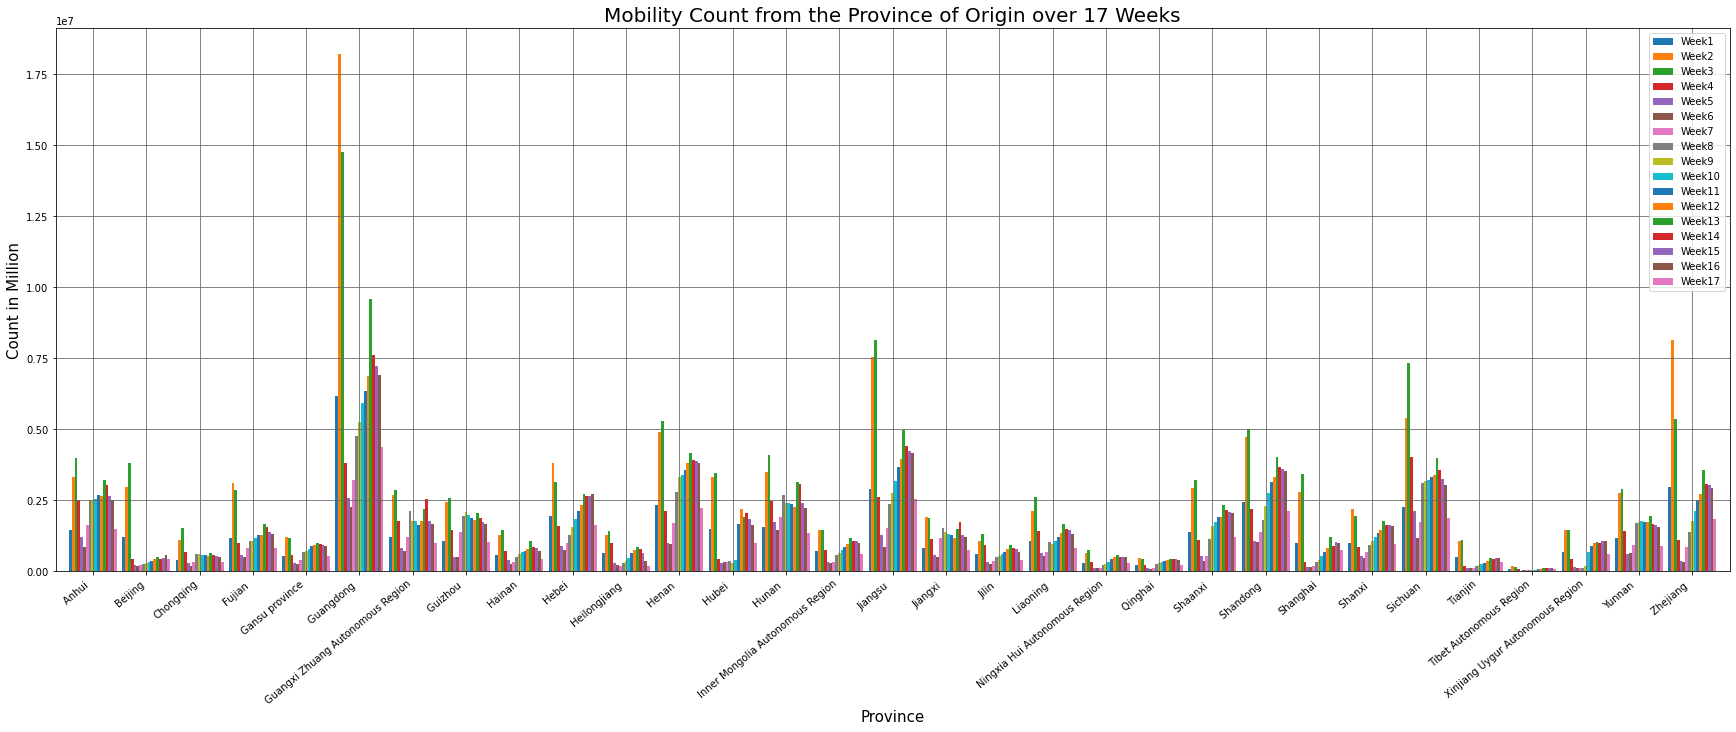

In [128]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling

#my_colors = ['maroon','teal','yellow','purple','green','navy','gold','black','forestgreen','steelblue','darkorange','indigo','darkred','skyblue','chocolate','magenta','yellowgreen','peru']
ax=o_prov.plot(kind='bar',width=0.9)
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count from the Province of Origin over 17 Weeks', fontsize=20)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Count in Million', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('./Media/origin_mobility.png') 
plt.show()


In [66]:
# aggregating by weeks for origin city
df_orig=a.groupby(['origin_city']).sum()

In [67]:
a.groupby(['origin_province']).max()

,origin_city,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_province,,,,,,,,,,,,,,,,,,,,,,,,,,
Anhui,Xuancheng,341800,118.751200,33.957800,Zunyi,Zhejiang,659009,131.1514,52.451053,46445,113075,188091,68208,34470,25241,36143,54198,58289,64028,72641,77170,114256,89512,75260,68670,41588
Beijing,Beijing,110000,116.400400,39.902800,Zunyi,Zhejiang,659009,131.1514,52.451053,202510,320624,280231,59109,54385,53520,63472,80009,94461,106881,125485,144244,166631,155362,177649,199196,118031
Chongqing,Chongqing,500000,106.545000,29.565800,Zunyi,Zhejiang,659009,131.1514,52.451053,45455,105901,182117,86786,27456,11984,18071,31416,34363,40173,46505,54530,71564,73262,65432,63322,38600
Fujian,Zhangzhou,350900,119.543000,27.368800,Zunyi,Zhejiang,659009,131.1514,52.451053,74116,130670,200640,64424,47152,45322,57892,74061,81103,91344,98265,100294,143797,118227,106219,94286,54663
Gansu province,Zhangye,623000,107.633600,39.774000,Zunyi,Zhejiang,659009,131.1514,52.451053,26316,56008,77258,25543,11375,11168,18562,30799,32808,35384,39321,39511,42317,41266,37670,34868,20396
Guangdong,Zhuhai city,445300,116.676800,24.813800,Zunyi,Zhejiang,659009,131.1514,52.451053,238145,438085,212975,72036,74333,99046,134575,200937,257190,310956,340345,365848,410584,366147,406575,388885,211469
Guangxi Zhuang Autonomous Region,Yulin,451400,111.559559,25.241800,Zunyi,Zhejiang,659009,131.1514,52.451053,40035,79028,125743,60853,17814,18292,31864,50836,38781,47411,43947,79651,85755,81992,53014,49498,28541
Guizhou,Zunyi,522700,109.207935,27.729600,Zunyi,Zhejiang,659009,131.1514,52.451053,75103,150062,212229,113007,24454,21912,85381,108263,108851,109498,106127,102526,139500,119694,94931,88786,55733
Hainan,Wuzhishan,469030,112.334000,20.046268,Zunyi,Zhejiang,659009,131.1514,52.451053,23607,51466,75191,29708,16486,13107,14195,23572,29585,34039,36226,38886,57607,44333,41021,37115,21895


In [68]:
df_orig.head()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_city,,,,,,,,,,,,,,,,,,,,,
of Yantai,44320.344,13674.652,40460.610906,11922.239716,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125
Aba Tibetan and Qiang Autonomous Prefecture,37310.446,11644.449,40479.816106,11927.801916,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454
Aksu region,29295.630,15026.612,40501.774506,11918.535716,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554
Ali area,29235.040,11863.595,40501.940506,11927.201516,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467
Altay region,32169.786,17466.564,40493.900106,11911.850916,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743


### Departure City Analysis

In [77]:
dep=a.drop(df2.iloc[:, 0:5], axis=1)
dep.head()

,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
dep_df=dep.drop(dep.iloc[:, 3:6], axis=1)
dep_df.head()

,dest_city,dest_province,city_id_d,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,230900,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,230900,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,230900,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [92]:
dep_df.drop('city_id_d',axis=1,inplace=True)

In [93]:
dep_df.head()

,dest_city,dest_province,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [94]:
dep_bar=dep_df.groupby('dest_city').sum().sum()

In [95]:
dep_bar

Week2     100120757
Week3     100984900
Week4      39571955
Week5      20058222
Week6      16450706
Week7      25529369
Week8      39042690
Week9      42215039
Week10     46126285
Week11     51120101
Week12     54216721
Week13     66379408
Week14     60504940
Week15     56580657
Week16     54099749
Week17     33019533
dtype: int64

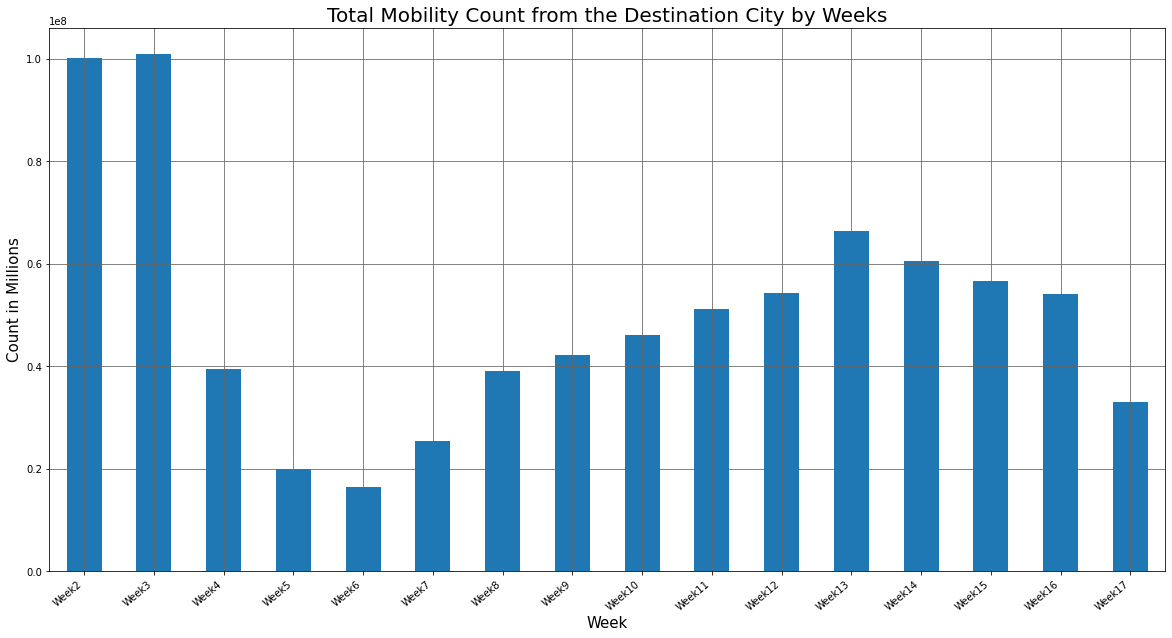

In [129]:
ax=dep_bar.plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Total Mobility Count from the Destination City by Weeks', fontsize=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Count in Millions', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/total_dest_mob.png')
plt.show()

In [80]:
# aggregating destination city and province data weekly
#d= dep_df.set_index(['dest_city','dest_province','city_id_d']).rename(columns=lambda x: pd.to_datetime(x))
#d = d.resample('W', axis=1).sum().reset_index()
#d.head(20)

In [81]:
d_prov=dep_df.groupby(['dest_province']).sum()
d_prov.head()

,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
dest_province,,,,,,,,,,,,,,,,
Anhui,5889344,6831671,1667359,757345,594726,855113,1505491,1721953,1989388,2360565,2527882,3316614,2753933,2610955,2535826,1627403
Beijing,1882203,1113236,1282703,738350,508668,468329,480359,447196,486785,542607,584425,658558,668389,624138,681196,421980
Chongqing,1711637,1598406,624816,271453,161189,242827,417476,420613,445815,489830,510590,582764,558229,525649,514571,330814
Fujian,2472427,2649885,1055940,575642,493340,894617,1229077,1242700,1297731,1334701,1320550,1715387,1550385,1397751,1308179,797244
Gansu province,1485202,1566450,548003,252538,232174,370534,640447,682581,781605,873426,885979,975362,925280,922966,882426,526277


In [82]:
d_prov['dest_province']=d_prov.index

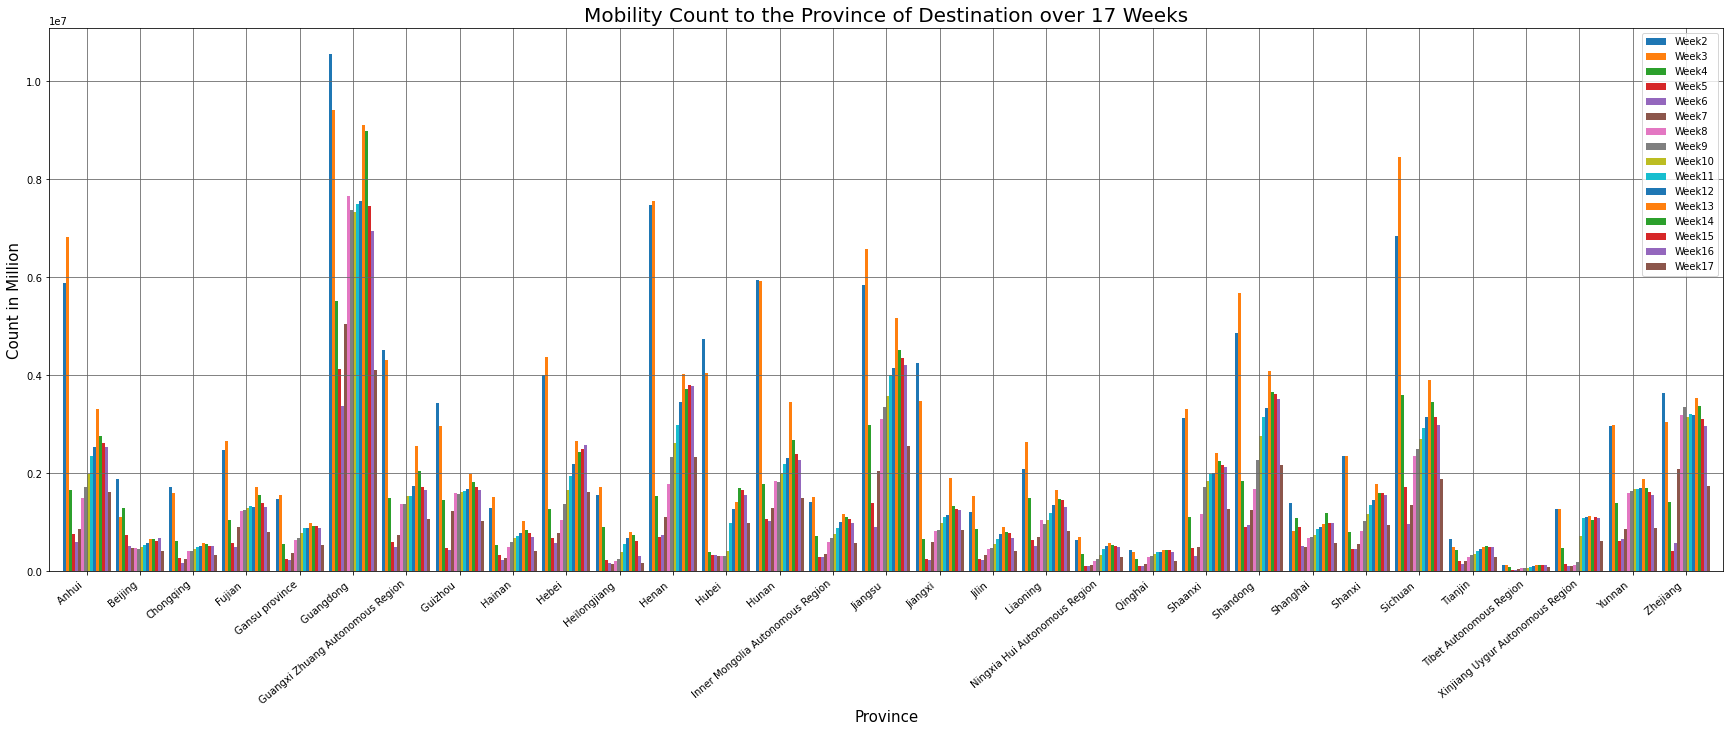

In [131]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='bar',width=0.9)
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count to the Province of Destination over 17 Weeks', fontsize=20)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Count in Million', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('./Media/destination_mobility.png')
plt.show()
